# Sleep Disorder & Lifestyle

<img src="Sleep_disorder_picture.jpg" alt="Alt Text" width="1200" height="800">

## Description 

**Dataset Overview:**

The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

**Key Features of the Dataset:**

Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
Cardiovascular Health: Examine blood pressure and heart rate measurements.
Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

**Dataset Columns:**

| No. | Column                 | Description    |
|-----|------------------------|----------------|
| 1   | Person ID              | An identifier for each individual.   |
| 2   | Gender                 | The gender of the person (Male/Female).   |
| 3   | Age                    | The age of the person in years.   |
| 4   | Occupation             | The occupation or profession of the person. |
| 5   | Sleep Duration         | The number of hours the person sleeps per day.     |
| 6   | Quality of Sleep       | A subjective rating of the quality of sleep, ranging from 1 to 10.  |
| 7   | Physical Activity Level| The number of minutes the person engages in physical activity daily (minutes/day).    |
| 8   | Stress Level           | A subjective rating of the stress level experienced by the person, ranging from 1 to 10.  |
| 9   | BMI Category           | The BMI category of the person (e.g., Underweight, Normal, Overweight).  |
| 10  | Blood Pressure         | The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure (systolic/diastolic) .  |
| 11  | Heart Rate             | The resting heart rate of the person in beats per minute (bpm).  |
| 12  | Daily Steps            | The number of steps the person takes per day.  |
| 13  | Sleep Disorder         | The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea). <br /><br /> **None:** The individual does not exhibit any specific sleep disorder. <br /> **Insomnia:** The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.<br /> **Sleep Apnea:** The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.|

[Link to Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset)

## Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from statistics import mode

from IPython.display import Image
sns.set(style="darkgrid")

## Load Dataset

In [18]:
#Import dataset from CSV file
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [19]:
#Check information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


- Dataset has 13 columns and 374 rows
- We will use all columns to answer the questions we want to know, except Person ID

In [20]:
#Check Missing Value
df.isnull().sum()

Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
dtype: int64

In [22]:
#Drop Person ID Column
df.drop('Person ID', axis=1, inplace=True)

In [21]:
# Splitting the 'Blood Pressure' column
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True)

# Converting the new columns to integers
df['Systolic'] = df['Systolic'].astype(int)
df['Diastolic'] = df['Diastolic'].astype(int)

# Dropping the original 'Blood Pressure' column
df.drop('Blood Pressure', axis=1, inplace=True)

df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,126,83
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,125,80
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


In [29]:
#Change Sleep Disorder label: None = 0, Sleep Apnea & Insomnia = 1
df['Sleep Disorder'] = df['Sleep Disorder'].replace({'None': 0, 'Insomnia': 1, 'Sleep Apnea': 1})
df['Sleep Disorder'].unique()

array([0, 1], dtype=int64)

In [30]:
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,0,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,0,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,1,140,90


## Exploratory Data Analysis

In [38]:
numerical_columns = df[['Age', 'Sleep Duration', 'Quality of Sleep','Physical Activity Level', 'Stress Level', 'Systolic','Diastolic', 'Heart Rate', 'Daily Steps','Sleep Disorder']]

In [61]:
def plot_histogram_grid(dataframe):
    """
    Plot a grid of histograms for each numerical feature in the DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the numerical features.

    Returns:
        None
    """
    nrows = 4
    ncols = 3

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(30, 28))

    # Flatten the axes array to loop through features
    axes = ax.ravel()

    # Get the list of numerical columns
    numeric_columns = dataframe.columns

    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe, x=column, ax=axes[i], kde=True, color='teal')

        # Adding vertical axis count
        max_count = dataframe[column].value_counts().max()
        axes[i].set_yticks(range(0, max_count + 1, max_count // 4))
        
        axes[i].set_yticklabels(axes[i].get_yticks(), size=14)
        
        # Set custom x-axis tick labels
        axes[i].set_xlabel('Value', size=14)
        
        axes[i].set_ylabel('Frequency', size=14)
        axes[i].set_xlabel(xlabel=None)
        axes[i].set_title(label=column, size=16)

    # Remove any empty subplots
    for i in range(len(numeric_columns), nrows * ncols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

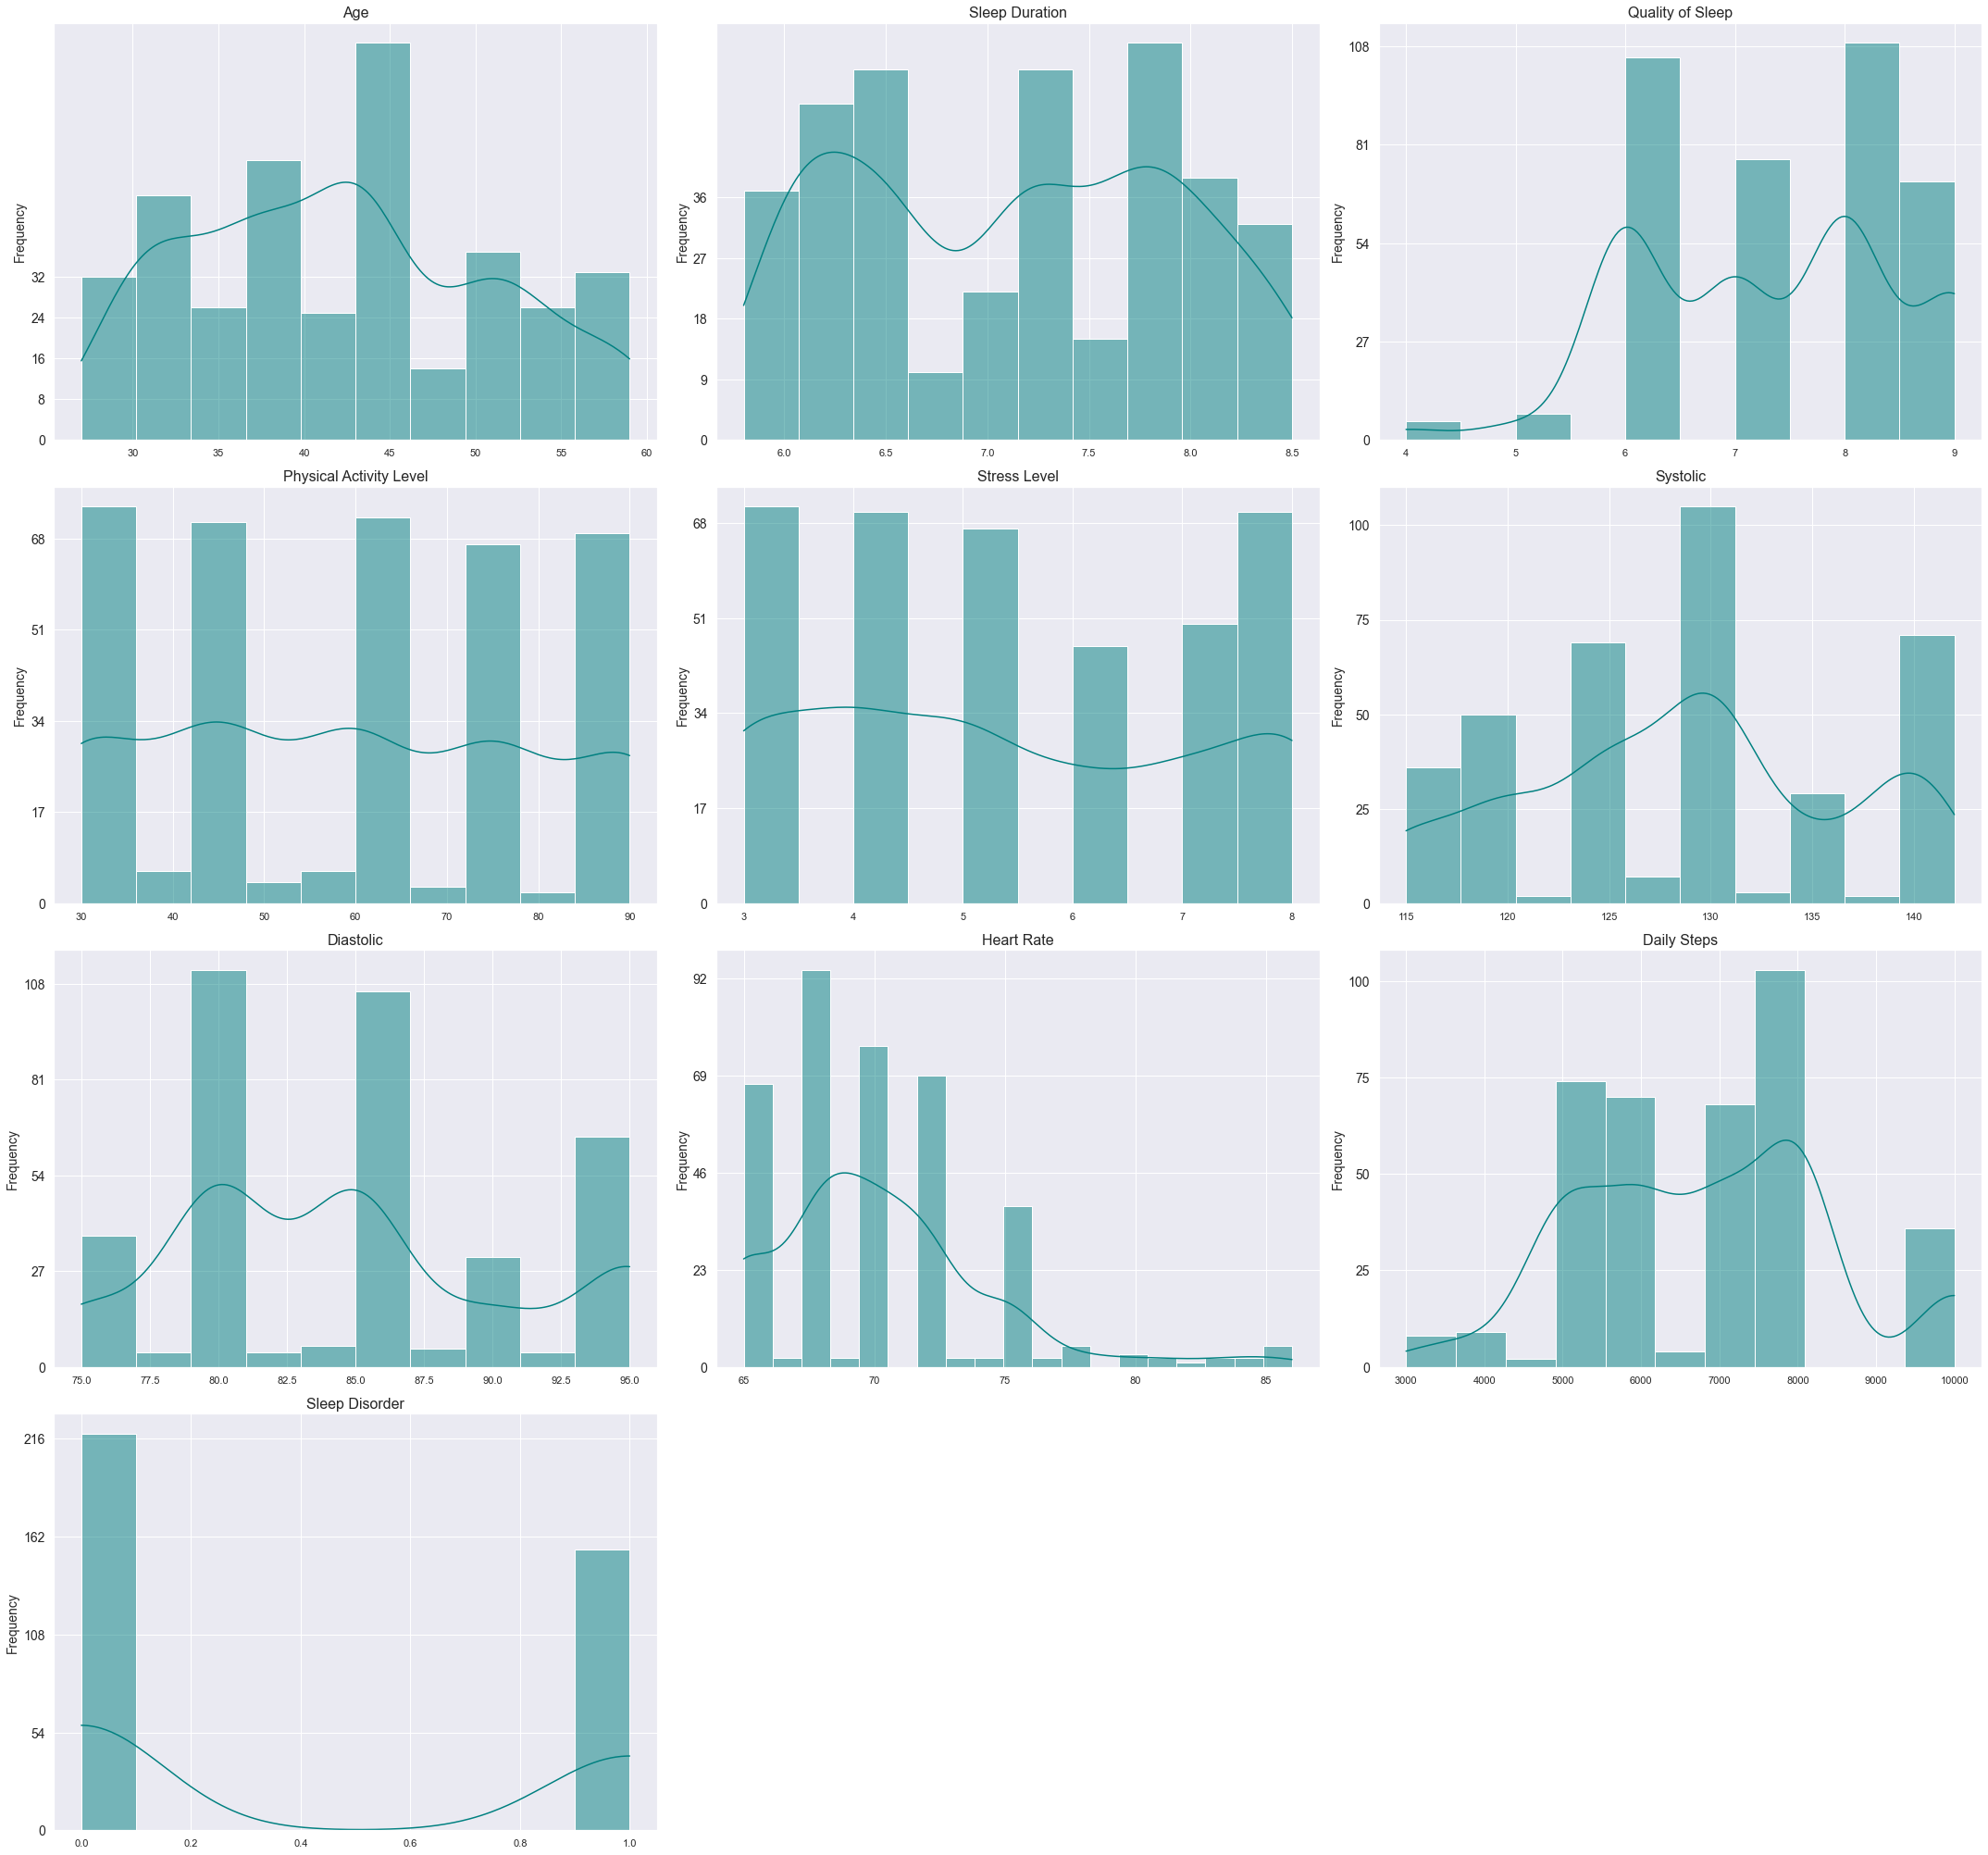

In [62]:
plot_histogram_grid(numerical_columns)

### Gender vs Sleep Disorders

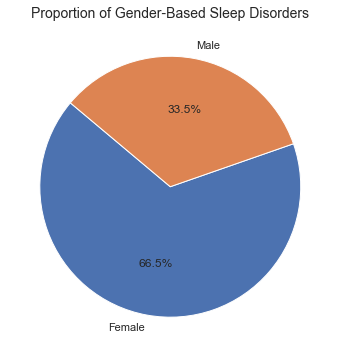

In [89]:
# Filter for rows for individuals who suffer sleep disorders
filtered_disorder = df[df['Sleep Disorder'] == 1]

# Calculate proportion of gender
gender_counts = filtered_disorder['Gender'].value_counts()
total_rows = len(filtered_disorder)
gender_proportions = (gender_counts / total_rows) * 100

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_proportions, labels=gender_proportions.index,
        autopct='%1.1f%%', startangle=140) 

# Add title
plt.title('Proportion of Gender-Based Sleep Disorders', size=14)

plt.show()

The figure represents the percentage of individuals who suffered from sleep disorders, grouped by gender. The number of women is greater than that of men, which accounts for 66.5 %. Females are twice as likely to have sleep problems than males.       

### Age vs Sleep Disorders

In [90]:
df['Age'].describe()

count    374.000000
mean      42.184492
std        8.673133
min       27.000000
25%       35.250000
50%       43.000000
75%       50.000000
max       59.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Age'>

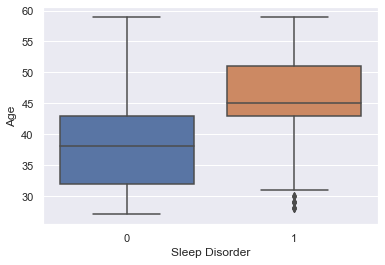

In [97]:
sns.boxplot(y = 'Age', x = 'Sleep Disorder', data = df)

The box plot shows age distribution by the binary sleep disorders value. Older people tend to experience sleep problems than younger people. 

### Occupation vs Sleep Disorders

In [102]:
df['Sleep Disorder'].value_counts()

0    219
1    155
Name: Sleep Disorder, dtype: int64

In [99]:
df['Occupation'].unique()

array(['Software Engineer', 'Doctor', 'Sales Representative', 'Teacher',
       'Nurse', 'Engineer', 'Accountant', 'Scientist', 'Lawyer',
       'Salesperson', 'Manager'], dtype=object)

In [117]:
df['Occupation'].value_counts()

Nurse                   73
Doctor                  71
Engineer                63
Lawyer                  47
Teacher                 40
Accountant              37
Salesperson             32
Software Engineer        4
Scientist                4
Sales Representative     2
Manager                  1
Name: Occupation, dtype: int64

In [105]:
df_Occupation = pd.DataFrame(data={"Occupation" : df["Occupation"].value_counts(normalize=True).index,
                                  "Percentage" : df["Occupation"].value_counts(normalize=True).values*100})
df_Occupation

,Occupation,Percentage
0,Nurse,19.518717
1,Doctor,18.983957
2,Engineer,16.844920
3,Lawyer,12.566845
4,Teacher,10.695187
5,Accountant,9.893048
6,Salesperson,8.556150
7,Software Engineer,1.069519
8,Scientist,1.069519
9,Sales Representative,0.534759


The table gives information about the proportion of the type of jobs in the dataset. Nurse accounts for around one-fifth of the total population, while Manager makes up the lowest percentage, with a value of 0.2 %. There is unbalanced data in each type of job, so it can be difficult to interpret. 

In [116]:
## Profesion that is free from sleep disorder
occupation_all = df_Occupation['Occupation'].unique().tolist()
occupation_disorder = df_Occupation_disorder['Occupation'].unique().tolist()

free_sleep_disorder_occupation = [item for item in occupation_all if item not in occupation_disorder]

print("A type of job that doesn't have sleep problems:", free_sleep_disorder_occupation)


A type of job that doesn't have sleep problems: ['Manager']


In [106]:
#filtered_disorder
df_Occupation_disorder = pd.DataFrame(data={"Occupation" : filtered_disorder["Occupation"].value_counts(normalize=True).index,
                                  "Percentage" : filtered_disorder["Occupation"].value_counts(normalize=True).values*100})
df_Occupation_disorder

,Occupation,Percentage
0,Nurse,41.290323
1,Teacher,20.000000
2,Salesperson,19.354839
3,Doctor,4.516129
4,Accountant,4.516129
5,Engineer,3.870968
6,Lawyer,3.225806
7,Sales Representative,1.290323
8,Scientist,1.290323
9,Software Engineer,0.645161


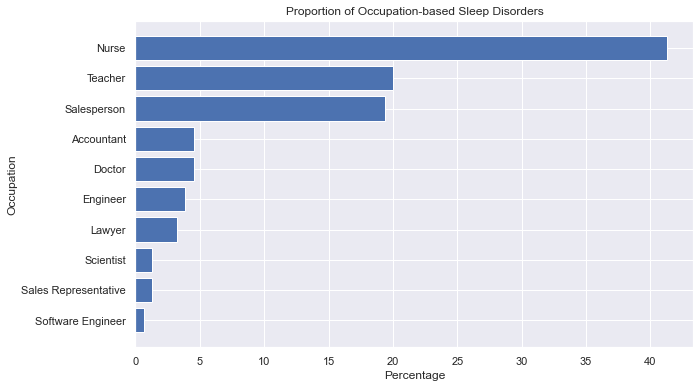

In [107]:
# Plot Graph
plt.figure(figsize = (10,6))
dfbarplot = df_Occupation_disorder.sort_values('Percentage', ascending=True)
plt.barh(data = dfbarplot, y = 'Occupation', width = 'Percentage')
plt.title('Proportion of Occupation-based Sleep Disorders')
plt.ylabel('Occupation')
plt.xlabel('Percentage')
plt.show()

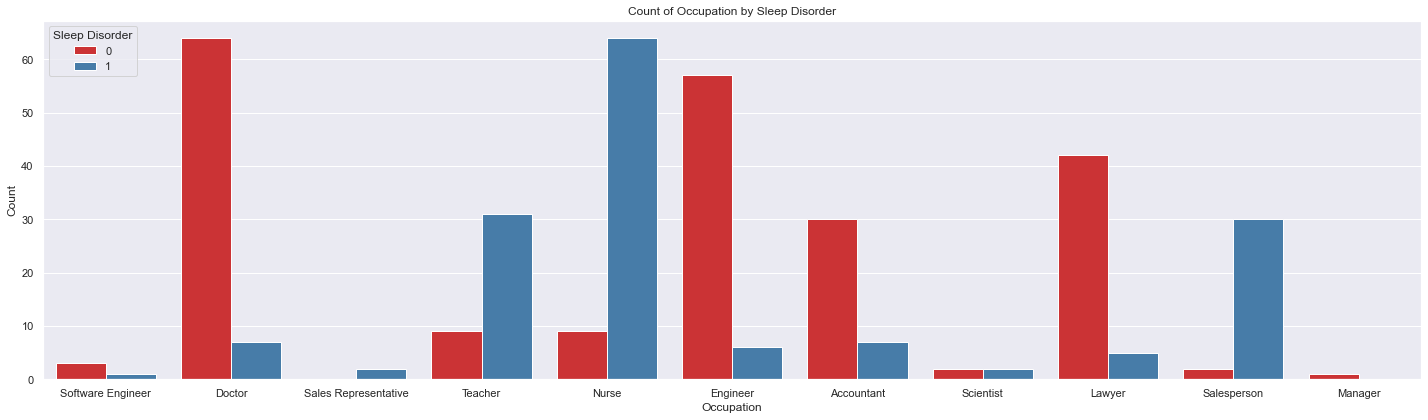

In [133]:
# Create a count plot
plt.figure(figsize=(20, 6))
sns.countplot(data=df, x='Occupation', hue='Sleep Disorder', palette='Set1')

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Occupation by Sleep Disorder')

plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

### Sleep Duration vs Sleep Disorders

In [118]:
df['Sleep Duration'].describe()

count    374.000000
mean       7.132086
std        0.795657
min        5.800000
25%        6.400000
50%        7.200000
75%        7.800000
max        8.500000
Name: Sleep Duration, dtype: float64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Sleep Duration'>

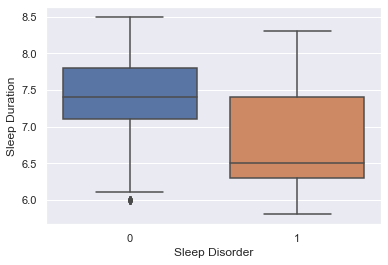

In [119]:
sns.boxplot(y = 'Sleep Duration', x = 'Sleep Disorder', data = df)

The box plot shows sleep duration distribution by the binary sleep disorders value. Individuals are prone to experience sleep problems if they lack of sleep.

### Quality of Sleep vs Sleep Disorders

In [123]:
df['Quality of Sleep'].value_counts()

8    109
6    105
7     77
9     71
5      7
4      5
Name: Quality of Sleep, dtype: int64

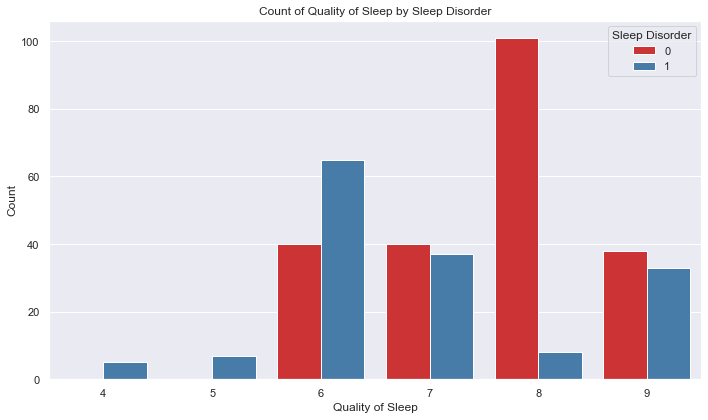

In [122]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Quality of Sleep', hue='Sleep Disorder', palette='Set1')

# Add labels and title
plt.xlabel('Quality of Sleep')
plt.ylabel('Count')
plt.title('Count of Quality of Sleep by Sleep Disorder')

plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

The multi-bar graph shows how many individuals have sleep problems or not based on their quality of sleep. People with sleep quality below six tend to have more sleep problems than those with better sleep quality. A small number of people with an eight-number sleep quality have sleep problems. Eight is the best number of sleep quality because a large number of people have no issues with sleep compared to the rest number of sleep quality.  

### Physical Activity Level vs Sleep Disorders

In [128]:
df['Physical Activity Level'].value_counts()

60    70
30    68
45    68
75    67
90    67
40     6
55     6
35     4
50     4
70     3
42     2
32     2
80     2
65     2
85     2
47     1
Name: Physical Activity Level, dtype: int64

In [125]:
df['Physical Activity Level'].describe()

count    374.000000
mean      59.171123
std       20.830804
min       30.000000
25%       45.000000
50%       60.000000
75%       75.000000
max       90.000000
Name: Physical Activity Level, dtype: float64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Physical Activity Level'>

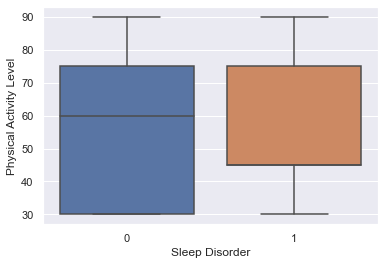

In [127]:
sns.boxplot(y = 'Physical Activity Level', x = 'Sleep Disorder', data = df)

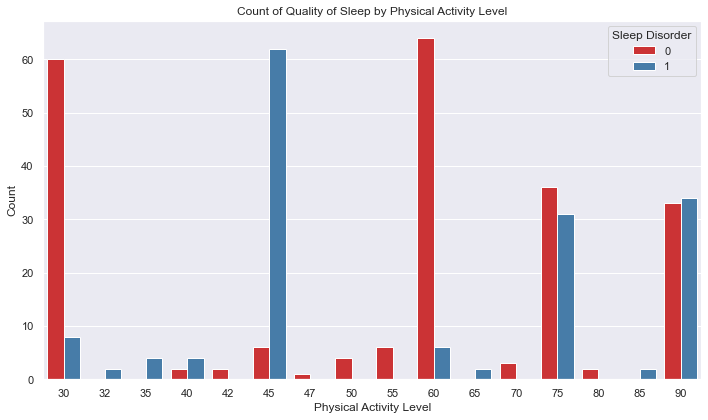

In [131]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Physical Activity Level', hue='Sleep Disorder', palette='Set1')

# Add labels and title
plt.xlabel('Physical Activity Level')
plt.ylabel('Count')
plt.title('Count of Quality of Sleep by Physical Activity Level')

plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

People with a forty-five-number physical activity level are more likely to have sleep disorders than individuals with other numbers.

### Stress Level vs Sleep Disorder

In [129]:
df['Stress Level'].value_counts()

3    71
8    70
4    70
5    67
7    50
6    46
Name: Stress Level, dtype: int64

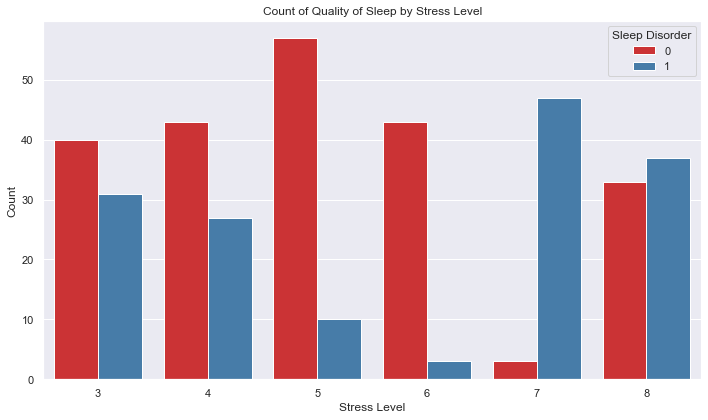

In [130]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stress Level', hue='Sleep Disorder', palette='Set1')

# Add labels and title
plt.xlabel('Stress Level')
plt.ylabel('Count')
plt.title('Count of Quality of Sleep by Stress Level')

plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

People with stress levels below and equal to six sleep better than those with a higher stress level.

### BMI Category vs Sleep Disorders

In [135]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

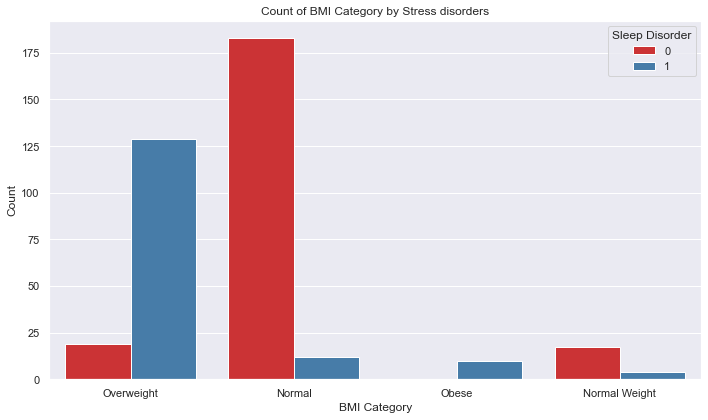

In [137]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='BMI Category', hue='Sleep Disorder', palette='Set1')

# Add labels and title
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Count of BMI Category by Stress disorders')

plt.legend(title='Sleep Disorder')
plt.tight_layout()
plt.show()

Overweight people tend to have sleep problems 

### Heart Rate vs Sleep Disorders

In [138]:
df['Heart Rate'].value_counts()

68    94
70    76
72    69
65    67
75    36
78     5
85     3
80     3
84     2
83     2
73     2
67     2
74     2
77     2
81     2
76     2
69     2
86     2
82     1
Name: Heart Rate, dtype: int64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Heart Rate'>

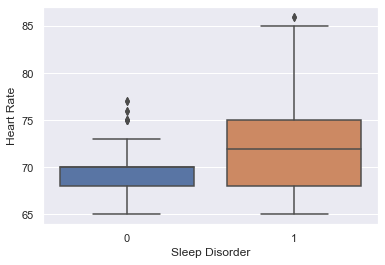

In [139]:
sns.boxplot(y = 'Heart Rate', x = 'Sleep Disorder', data = df)

People with a higher heart rate tend to have sleep problems

### Daily Steps vs Sleep Disorders

In [140]:
df['Daily Steps'].value_counts()

8000     101
6000      68
5000      68
7000      66
10000     36
5500       4
3000       3
3500       3
4000       3
6800       3
4800       2
7300       2
7500       2
4200       2
3300       2
5600       2
5200       2
4100       2
3700       2
6200       1
Name: Daily Steps, dtype: int64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Daily Steps'>

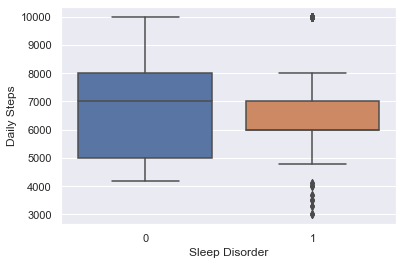

In [141]:
sns.boxplot(y = 'Daily Steps', x = 'Sleep Disorder', data = df)

People with sleep problems have small variance in their daily steps than those with no sleep disorders

### Systolic vs Sleep Disorders

In [142]:
df['Systolic'].value_counts()

130    101
140     69
125     69
120     45
115     34
135     29
128      5
132      3
118      3
126      2
119      2
142      2
131      2
129      2
117      2
139      2
121      1
122      1
Name: Systolic, dtype: int64

In [143]:
df['Systolic'].describe()

count    374.000000
mean     128.553476
std        7.748118
min      115.000000
25%      125.000000
50%      130.000000
75%      135.000000
max      142.000000
Name: Systolic, dtype: float64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Systolic'>

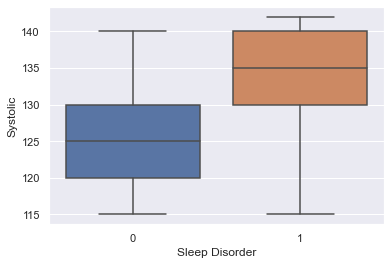

In [144]:
sns.boxplot(y = 'Systolic', x = 'Sleep Disorder', data = df)

People with a higher systolic pressure tend to have sleep disorders 

### Diastolics vs Sleep Disorders

In [145]:
df['Diastolic'].describe()

count    374.000000
mean      84.649733
std        6.161611
min       75.000000
25%       80.000000
50%       85.000000
75%       90.000000
max       95.000000
Name: Diastolic, dtype: float64

<AxesSubplot:xlabel='Sleep Disorder', ylabel='Diastolic'>

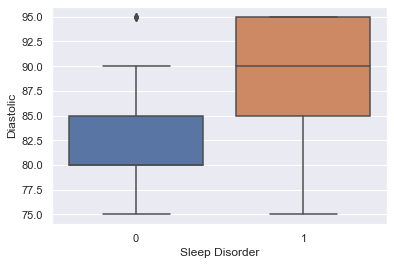

In [146]:
sns.boxplot(y = 'Diastolic', x = 'Sleep Disorder', data = df)

People with a lower diastolic pressure tend to have no issues with sleep 

### Correlation 

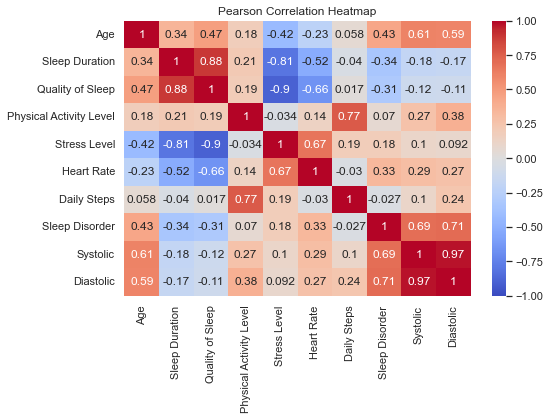

In [147]:
# Calculate Pearson correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add title
plt.title('Pearson Correlation Heatmap')

plt.tight_layout()
plt.show()

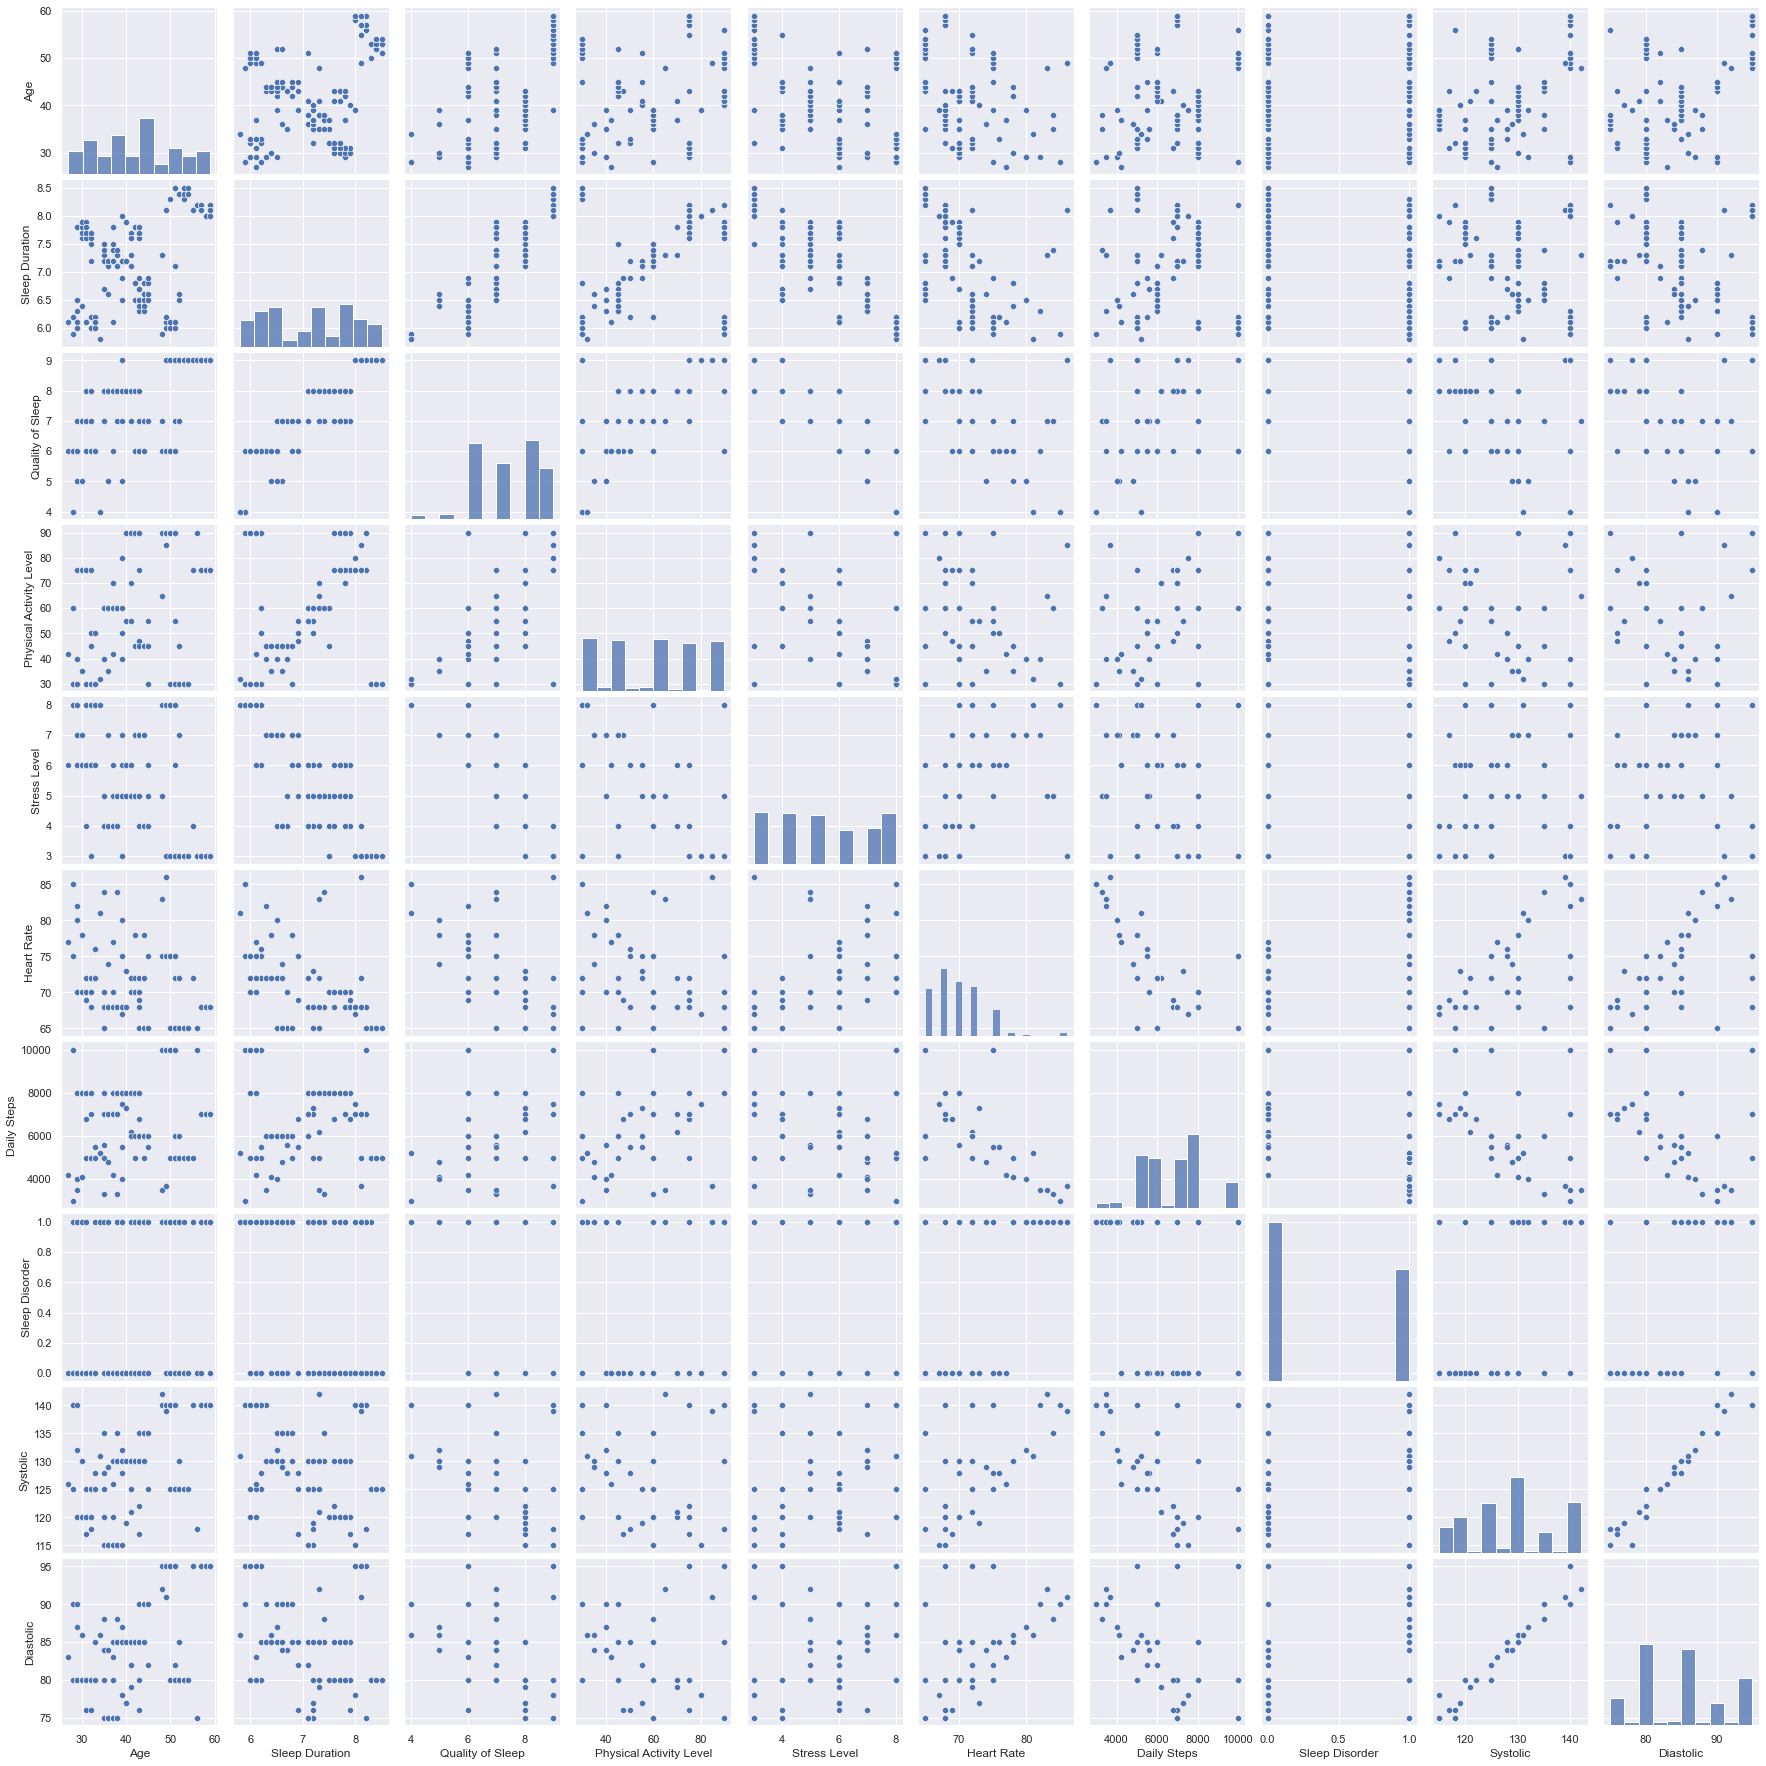

In [148]:
# Create a pair plot using Seaborn
sns.pairplot(df)
plt.show()

### Conclusion 

1. Females are twice as likely to have sleep problems than males
2. Older people tend to experience sleep problems than younger people.
3. Occupation is hard to interpret (Exclude)
4. Individuals are prone to experience sleep problems if they lack of sleep (shorter sleep length)
5. Higher sleep quality are better
6. People with a forty-five-number physical activity level are more likely to have sleep disorders than individuals with other numbers (Exclude)
7. People with stress levels below and equal to six sleep better than those with a higher stress level. (Exclude)
8. Overweight people tend to have sleep problems 
9. People with a higher heart rate tend to have sleep problems
10. People with sleep problems have small variance in their daily steps than those with no sleep disorders (Exclude)
11. People with a higher systolic pressure tend to have sleep disorders 
12. People with a lower diastolic pressure tend to have no issues with sleep 

Variables for statistical test : Gender, Age, Sleep duration, Quality of Sleep, BMI Category, Heart rate, Systolic, & Diastolic

## Statistical Test

### Gender

Ho = Proportion Sleep-disorders Male <= Proportion Sleep-disorders Female (Pm <= Pf) </br>
H1 = Proportion Sleep-disorders Male > Proportion Sleep-disorders Female (Pm>Pf)

In [152]:
# The number of successes in observasion
male_disorders = (df['Gender'] == 'Male') & (df['Sleep Disorder'] == 1)
female_disorders = (df['Gender'] == 'Female') & (df['Sleep Disorder'] == 1)

male_disorders_data = df[male_disorders]
female_disorders_data = df[female_disorders]

n_male_disorders = len(male_disorders_data)
n_female_disorders = len(female_disorders_data)

n_male = df['Gender'].value_counts()['Male']
n_female = df['Gender'].value_counts()['Female']

In [153]:
from statsmodels.stats.proportion import proportions_ztest

# Perform two proportion z-test
test_stat, p_value = proportions_ztest(count = [n_male_disorders , n_female_disorders], 
                                                nobs = [n_male, n_female], 
                                                alternative = 'larger')

print("The computed Z test statistic is: ",np.round(test_stat, 4))
print("The p-value is: ", np.round(p_value,4))

The computed Z test statistic is:  -5.5276
The p-value is:  1.0


In [154]:
# critical value in our case is z-value where the left-tailed area under a standard normal distribution is 0.05 (alpha)
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


In [155]:
# Decision rule
if p_value<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


In [157]:
def visualize_z_test(test_stat, z_crit, p_value):
    plt.style.use('seaborn')

    # plot sample distribution
    x = np.arange(-4, 4, 0.001)
    plt.plot(x, stats.norm.pdf(x, 0, 1), color='blue')

    # plot alpha region
    x_alpha = np.arange(1.645, 4, 0.01)
    y_alpha = stats.norm.pdf(x_alpha)
    plt.fill_between(x=x_alpha, y1=y_alpha, facecolor='red', alpha=0.35, label='alpha')

    # plot pvalue
    x_pvalue = np.arange(test_stat, 4, 0.01)
    y_pvalue = stats.norm.pdf(x_pvalue)
    plt.fill_between(x=x_pvalue, y1=y_pvalue, facecolor='green', alpha=0.35, label='pvalue')

    # plot z-crit and z-stats
    plt.axvline(np.round(test_stat, 4), color="green", linestyle="--", label="z-stat")
    plt.axvline(z_crit, color="red", linestyle="--", label="z-crit")

    plt.legend()
    plt.xlabel("z")
    plt.ylabel("density")

    plt.title(f'Standard Normal Distribution Plot \n\n z-statistic = {np.round(test_stat, 4)}, z_crit = {np.round(z_crit, 4)}, p-val = {np.round(p_value, 4)}, alpha = 0.05')

    plt.show()

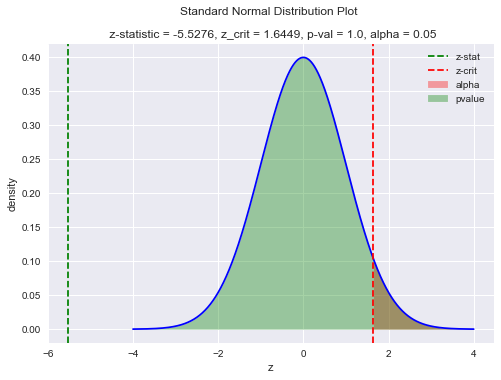

In [158]:
visualize_z_test(test_stat, z_crit, p_value)

### Age

Ho = mean age sleep-disorders people = mean age people with no sleep disorders (us = un) </br>
H1 = mean age sleep-disorders people greater than mean age people with no sleep disorders (us > un)

In [183]:
#Check Variance
import numpy as np

# bike rent on weekdays
age_sleep_disorders = df[df['Sleep Disorder']==0]['Age'].values

# bike rent on weekend
age_normal_sleep = df[df['Sleep Disorder']==1]['Age'].values

# variance 
np.var(age_sleep_disorders), np.var(age_normal_sleep)

(60.99409937240675, 61.05831425598336)

In [184]:
from scipy import stats
stat_age = stats.ttest_ind(a = age_sleep_disorders, 
                         b = age_normal_sleep, 
                         equal_var=False, 
                         alternative = "greater")

In [185]:
stat_age.pvalue

1.0

In [186]:
stat_age.statistic

-9.236527358976078

In [187]:
# Menentukan aturan keputusan
if stat_age.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


In [188]:
df_data_age = len(age_sleep_disorders)+len(age_normal_sleep)-2
df_data_age

372

In [189]:
def visualize_t_test(result, df_data_age):
    plt.style.use('seaborn')

    # plot sample distribution
    x = np.arange(-4, 14, 0.001)
    plt.plot(x, stats.t.pdf(x, df=df_data_age), color='blue')

    # plot alpha region
    x_alpha = np.arange(stats.t.ppf(1-0.05, df=df_data_age), 4, 0.01)
    y_alpha = stats.t.pdf(x_alpha, df=df_data_age)
    plt.fill_between(x=x_alpha, y1=y_alpha, facecolor='red', alpha=0.35, label='alpha')

    # plot pvalue
    x_pvalue = np.arange(result.statistic, 4, 0.01)
    y_pvalue = stats.t.pdf(x_pvalue, df=df_data_age)
    plt.fill_between(x=x_pvalue, y1=y_pvalue, facecolor='green', alpha=0.35, label='pvalue')

    # plot t-crit and t-stats
    plt.axvline(np.round(result.statistic, 4), color="green", linestyle="--", label="t-stat")

    t_crit = np.round(stats.t.ppf(1-0.05, df=df_data_age), 4)
    plt.axvline(t_crit, color="red", linestyle="--", label="t-crit")

    plt.legend()
    plt.xlabel("t")
    plt.ylabel("density")

    plt.title(f't Distribution Plot with df = {df_data_age} \n\n t-statistic = {np.round(result.statistic, 4)}, t_crit = {np.round(t_crit, 4)}, alpha = 0.05')

    plt.show()

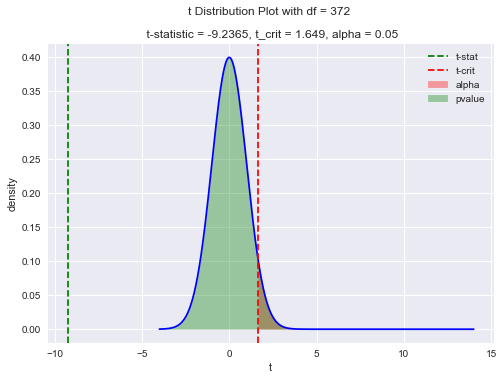

In [190]:
visualize_t_test(stat_age, df_data_age)

Taking into consideration based on Hypothetical testing, Age variables can be excluded. 

In [159]:
# The number of successes in observasion
sleep_disorders = (df['Sleep Disorder'] == 1)
normal_sleep =  (df['Sleep Disorder'] == 0)

sleep_disorders_data = df[sleep_disorders]
normal_sleep_data = df[normal_sleep]

mean_age_sleep_disorders = sleep_disorders_data['Age'].mean()
mean_age_normal_sleep = normal_sleep_data['Age'].mean()

print("The mean age of people with sleep disorders: ", np.round(mean_age_sleep_disorders,2))
print("The mean age of people with normal sleep: ", np.round(mean_age_normal_sleep,2))

The mean age of people with sleep disorders:  46.63
The mean age of people with normal sleep:  39.04


### Sleep Duration 

Ho = mean sleep duration sleep-disorders people = mean sleep duration people with no sleep disorders (us = un) </br>
H1 = mean sleep duration sleep-disorders people less than mean sleep duration people with no sleep disorders (us < un)

In [171]:
#Check Variance
import numpy as np

# sleep duration on people with sleep disorders
sleep_duration_sleep_disorders = df[df['Sleep Disorder']==0]['Sleep Duration'].values

# sleep duration on people with sleep normally
sleep_duration_normal_sleep = df[df['Sleep Disorder']==1]['Sleep Duration'].values

# variance 
np.var(sleep_duration_sleep_disorders), np.var(sleep_duration_normal_sleep)

(0.5338441650507705, 0.594494901144641)

In [192]:
from scipy import stats
stat_sleep_duration = stats.ttest_ind(a = sleep_duration_sleep_disorders, 
                         b = sleep_duration_normal_sleep, 
                         equal_var=False, 
                         alternative = "less")

In [193]:
stat_sleep_duration.pvalue

0.9999999999838743

In [194]:
stat_sleep_duration.statistic

6.876330247011118

In [195]:
# Menentukan aturan keputusan
if stat_sleep_duration.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


In [196]:
df_data_sleep_duration = len(sleep_duration_sleep_disorders)+len(sleep_duration_normal_sleep)-2
df_data_sleep_duration

372

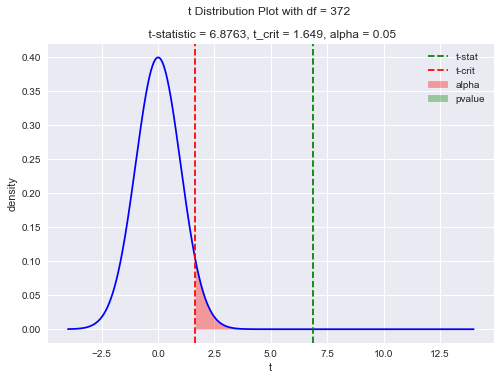

In [197]:
visualize_t_test(stat_sleep_duration, df_data_sleep_duration)

Based on the test, It means that there is no difference in sleep duration between people who sleep normally and people who have sleep disorders. 

### Quality of Sleep

Ho = mean sleep quality sleep-disorders people = mean sleep quality with no sleep disorders (us = un) </br>
H1 = mean sleep quality sleep-disorders people less than mean sleep quality people with no sleep disorders (us < un)

In [198]:
#Check Variance
import numpy as np

# sleep duration on people with sleep disorders
sleep_quality_sleep_disorders = df[df['Sleep Disorder']==0]['Quality of Sleep'].values

# sleep duration on people with sleep normally
sleep_quality_normal_sleep = df[df['Sleep Disorder']==1]['Quality of Sleep'].values

# variance 
np.var(sleep_quality_sleep_disorders), np.var(sleep_quality_normal_sleep)

(0.9465607472738267, 1.7768990634755464)

In [199]:
from scipy import stats
stat_sleep_quality = stats.ttest_ind(a = sleep_quality_sleep_disorders, 
                         b = sleep_quality_normal_sleep, 
                         equal_var=False, 
                         alternative = "less")

In [200]:
stat_sleep_quality.pvalue

0.9999999965608106

In [201]:
stat_sleep_quality.statistic

5.9880969268892725

In [202]:
# Menentukan aturan keputusan
if stat_sleep_quality.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Failed to reject the Null hypothesis


In [203]:
df_data_sleep_quality = len(sleep_quality_sleep_disorders)+len(sleep_quality_normal_sleep)-2
df_data_sleep_quality

372

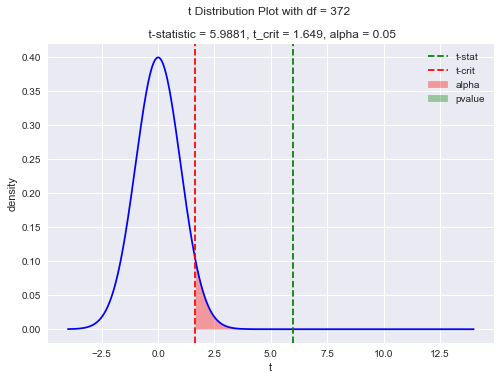

In [204]:
visualize_t_test(stat_sleep_quality, df_data_sleep_quality)

Based on the test, It means that there is no difference in sleep quality between people who sleep normally and people who have sleep disorders. 

### BMI Category

In [205]:
df['BMI Category'].value_counts()

Normal           195
Overweight       148
Normal Weight     21
Obese             10
Name: BMI Category, dtype: int64

In [206]:
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Normal')

In [207]:
df['BMI Category'] = df['BMI Category'].replace('Obese', 'Overweight')

In [208]:
df['BMI Category'].value_counts()

Normal        216
Overweight    158
Name: BMI Category, dtype: int64

Ho = Proportion Sleep-disorders Normal Weight >= Proportion Sleep-disorders Overweight (Pm >= Pf) </br>
H1 = Proportion Sleep-disorders Normal Weight < Proportion Sleep-disorders Overweight (Pm<Pf)

In [209]:
# The number of successes in observasion
normal_weight_disorders = (df['BMI Category'] == 'Normal') & (df['Sleep Disorder'] == 1)
overweight_disorders = (df['BMI Category'] == 'Overweight') & (df['Sleep Disorder'] == 1)

normal_weight_disorders_data = df[normal_weight_disorders]
overweight_disorders_data = df[overweight_disorders]

n_normal_weight_disorders = len(normal_weight_disorders_data)
n_overweight_disorders = len(overweight_disorders_data)

n_normal_weight = df['BMI Category'].value_counts()['Normal']
n_overweight = df['BMI Category'].value_counts()['Overweight']

In [213]:
from statsmodels.stats.proportion import proportions_ztest

# Perform two proportion z-test
test_stat, p_value = proportions_ztest(count = [n_normal_weight_disorders , n_overweight_disorders], 
                                                nobs = [n_normal_weight, n_overweight], 
                                                alternative = 'smaller')

print("The computed Z test statistic is: ",np.round(test_stat, 4))
print("The p-value is: ", np.round(p_value,4))

The computed Z test statistic is:  -15.6229
The p-value is:  0.0


In [214]:
# critical value in our case is z-value where the left-tailed area under a standard normal distribution is 0.05 (alpha)
import scipy.stats as stats
z_crit = stats.norm.ppf(1-0.05)
print(z_crit)

1.6448536269514722


In [215]:
# Decision rule
if p_value<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


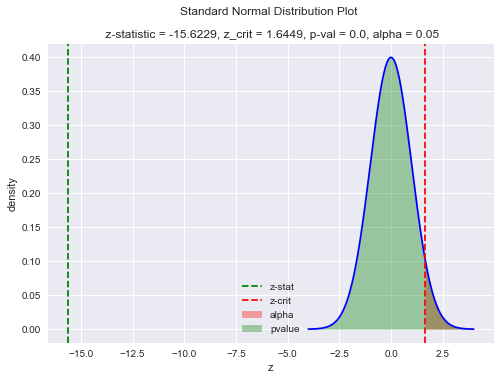

In [217]:
visualize_z_test(test_stat, z_crit, p_value)

The Proportion of people with normal weight who have sleep disorders is less than the proportion of people with overweight

### Heart Rate

Ho = mean heart rate sleep-disorders people = mean heart rate people with no sleep disorders (us = un) </br>
H1 = mean heart rate sleep-disorders people less than mean heart rate people with no sleep disorders (us < un)

In [219]:
#Check Variance
import numpy as np

# sleep duration on people with sleep disorders
heart_rate_sleep_disorders = df[df['Sleep Disorder']==0]['Heart Rate'].values

# sleep duration on people with sleep normally
heart_rate_normal_sleep = df[df['Sleep Disorder']==1]['Heart Rate'].values

# variance 
np.var(heart_rate_sleep_disorders), np.var(heart_rate_normal_sleep)

(7.031629865932738, 26.73531737773153)

In [220]:
from scipy import stats
stat_heart_rate = stats.ttest_ind(a = heart_rate_sleep_disorders, 
                         b = heart_rate_normal_sleep, 
                         equal_var=False, 
                         alternative = "less")

In [221]:
stat_heart_rate.pvalue

2.4596983766729616e-09

In [222]:
stat_heart_rate.statistic

-6.10252277092434

In [223]:
# Menentukan aturan keputusan
if stat_heart_rate.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [224]:
df_data_heart_rate = len(heart_rate_sleep_disorders)+len(heart_rate_normal_sleep)-2
df_data_heart_rate

372

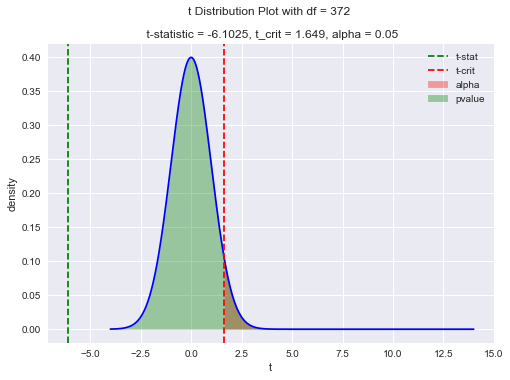

In [225]:
visualize_t_test(stat_heart_rate, df_data_heart_rate)

Based on the test, It means that there is difference in heart rate between people who sleep normally and people who have sleep disorders. 

### Systolic

Ho = mean systolic sleep-disorders people = mean systolic people with no sleep disorders (us = un) </br>
H1 = mean systolic sleep-disorders people less than mean systolic people with no sleep disorders (us < un)

In [ ]:
#Check Variance
import numpy as np

# sleep duration on people with sleep disorders
systolic_sleep_disorders = df[df['Sleep Disorder']==0]['Systolic'].values

# sleep duration on people with sleep normally
systolic_normal_sleep = df[df['Sleep Disorder']==1]['Systolic'].values

# variance 
np.var(systolic_sleep_disorders), np.var(systolic_normal_sleep)

(32.73764099997915, 28.935941727367325)

In [ ]:
from scipy import stats
stat_systolic = stats.ttest_ind(a = systolic_sleep_disorders, 
                         b = systolic_normal_sleep, 
                         equal_var=False, 
                         alternative = "less")

In [ ]:
stat_systolic.pvalue

1.201964916776694e-54

In [ ]:
stat_systolic.statistic

-18.706976173841948

In [ ]:
# Menentukan aturan keputusan
if stat_systolic.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [ ]:
df_data_systolic = len(systolic_sleep_disorders)+len(systolic_normal_sleep)-2
df_data_systolic

372

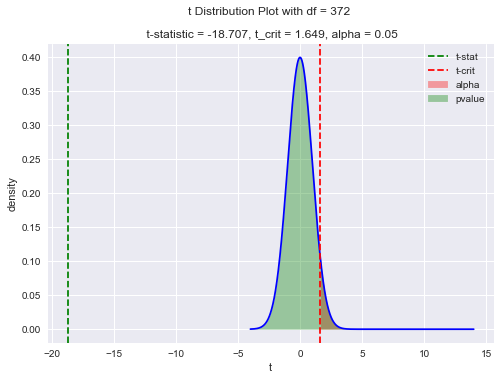

In [ ]:
visualize_t_test(stat_systolic, df_data_systolic)

Based on the test, It means that systolic between people who sleep normally and people who have sleep disorders is not equal 

### Diastolic

Ho = mean Diastolic sleep-disorders people = mean Diastolic people with no sleep disorders (us = un) </br>
H1 = mean Diastolic sleep-disorders people less than mean Diastolic people with no sleep disorders (us < un)

In [234]:
#Check Variance
import numpy as np

# sleep duration on people with sleep disorders
diastolic_sleep_disorders = df[df['Sleep Disorder']==0]['Diastolic'].values

# sleep duration on people with sleep normally
diastolic_normal_sleep = df[df['Sleep Disorder']==1]['Diastolic'].values

# variance 
np.var(diastolic_sleep_disorders), np.var(diastolic_normal_sleep)

(15.853881278538813, 23.549635796045784)

In [235]:
from scipy import stats
stat_diastolic = stats.ttest_ind(a = diastolic_sleep_disorders, 
                         b = diastolic_normal_sleep, 
                         equal_var=False, 
                         alternative = "less")

In [236]:
stat_diastolic.pvalue

2.0994441872435933e-51

In [237]:
stat_diastolic.statistic

-18.53912005994817

In [238]:
# Menentukan aturan keputusan
if stat_diastolic.pvalue<0.05:
    print("Reject the null hypothesis")
else:
    print("Failed to reject the Null hypothesis")

Reject the null hypothesis


In [239]:
df_data_diastolic = len(diastolic_sleep_disorders)+len(diastolic_normal_sleep)-2
df_data_diastolic

372

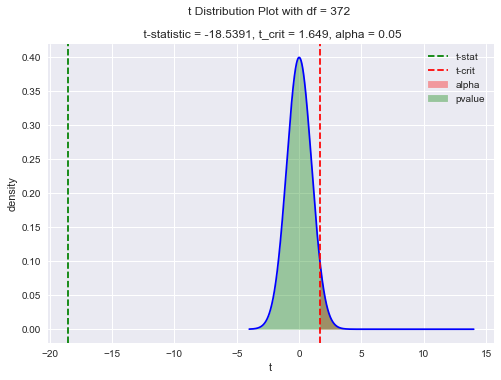

In [240]:
visualize_t_test(stat_diastolic, df_data_diastolic)

Based on the test, It means that diastolic between people who sleep normally and people who have sleep disorders is not equal 

### Conclusion 

In [241]:
predictors = df[['Gender', 'BMI Category','Heart Rate','Systolic','Diastolic']]
target = df[['Sleep Disorder']]

In [242]:
predictors.head()

,Gender,BMI Category,Heart Rate,Systolic,Diastolic
0,Male,Overweight,77,126,83
1,Male,Normal,75,125,80
2,Male,Normal,75,125,80
3,Male,Overweight,85,140,90
4,Male,Overweight,85,140,90


In [243]:
target.head()

,Sleep Disorder
0,0
1,0
2,0
3,1
4,1


## Logistic Regression

In [245]:
import warnings
warnings.simplefilter("ignore")

# load data
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# modelling
import statsmodels.formula.api as smf
from scipy.special import expit, logit

In [246]:
def print_coef_std_err(results):
    """
    Function to combine estimated coefficients and standard error in one DataFrame
    :param results: <statsmodels RegressionResultsWrapper> OLS regression results from 
    :return df: <pandas DataFrame> 
    """
    coef = results.params
    std_err = results.bse
    
    df = pd.DataFrame(data = np.transpose([coef, std_err]), 
                      index = coef.index, 
                      columns=["coef","std err"])
    return df

In [254]:
from sklearn.preprocessing import LabelEncoder

# Create LabelEncoder Object and transform the Default variable
predictors["Gender"] = LabelEncoder().fit_transform(predictors["Gender"]) #male =1 , female = 0
predictors["BMI Category"] = LabelEncoder().fit_transform(predictors["BMI Category"]) #Normal = 0, Overweight=1

In [248]:
predictors.head()

,Gender,BMI Category,Heart Rate,Systolic,Diastolic
0,1,1,77,126,83
1,1,0,75,125,80
2,1,0,75,125,80
3,1,1,85,140,90
4,1,1,85,140,90


In [253]:
df['BMI Category'].head()

0    Overweight
1        Normal
2        Normal
3    Overweight
4    Overweight
Name: BMI Category, dtype: object

In [255]:
predictors['Sleep Disorders'] = target
predictors.head()

,Gender,BMI Category,Heart Rate,Systolic,Diastolic,Sleep Disorders
0,1,1,77,126,83,0
1,1,0,75,125,80,0
2,1,0,75,125,80,0
3,1,1,85,140,90,1
4,1,1,85,140,90,1


In [261]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Gender           374 non-null    int64
 1   BMI Category     374 non-null    int64
 2   Heart Rate       374 non-null    int64
 3   Systolic         374 non-null    int32
 4   Diastolic        374 non-null    int32
 5   Sleep Disorders  374 non-null    int64
dtypes: int32(2), int64(4)
memory usage: 14.7 KB


In [263]:
# Case fold and remove space characters in column names
predictors.columns = predictors.columns.str.lower().str.replace(' ', '')

In [276]:
# Create Logit model object
logit_model = smf.logit("sleepdisorders ~ gender + bmicategory + heartrate + systolic + diastolic", predictors)

# Fit the model
model_switch = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_switch_coef = print_coef_std_err(model_switch)

Optimization terminated successfully.
         Current function value: 0.272994
         Iterations 8


In [277]:
results_switch_coef

,coef,std err
Intercept,-33.309732,8.167365
gender,-0.478539,0.437875
bmicategory,2.875856,0.458072
heartrate,0.111738,0.051645
systolic,0.262157,0.174480
diastolic,-0.116855,0.208470


In [274]:
predictors["logheartrate"] = np.log(predictors["heartrate"])
predictors["logsystolic"] = np.log(predictors["systolic"])
predictors["logdiastolic"] = np.log(predictors["diastolic"])

In [275]:
# Create Logit model object
logit_model = smf.logit("sleepdisorders ~ gender + bmicategory + logheartrate + logsystolic + logdiastolic", predictors)

# Fit the model
model_switch = logit_model.fit()

# Extract the results (Coefficient and Standard Error) to DataFrame
results_switch_coef = print_coef_std_err(model_switch)

Optimization terminated successfully.
         Current function value: 0.273579
         Iterations 8
